# Clustering and PCA Assignment 

In [385]:
# importing require libararies...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [386]:
# Importing dataset

country = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [387]:
# Checking basic parameters

country.shape

(167, 10)

In [388]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Checking for Outliers

In [389]:
# Checking for outliers in the continuous variables
num_country= country[['child_mort','exports','imports','income','inflation','life_expec','total_fer','gdpp']]

In [390]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [391]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [392]:
country.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [393]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###  Feature Standardisation

In [397]:
# Normalising continuous features
df = country[['child_mort','income','gdpp']]

In [398]:
normalized_df=(df-df.mean())/df.std()
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Splitting Data into Training and Test Sets

In [404]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = country.drop(['life_expec','total_fer','country','imports','exports'],axis=1)

# Putting response variable to y
y = country['gdpp']

y.head()

0      553
1     4090
2     4460
3     3530
4    12200
Name: gdpp, dtype: int64

In [405]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Correlation Matrix

In [406]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

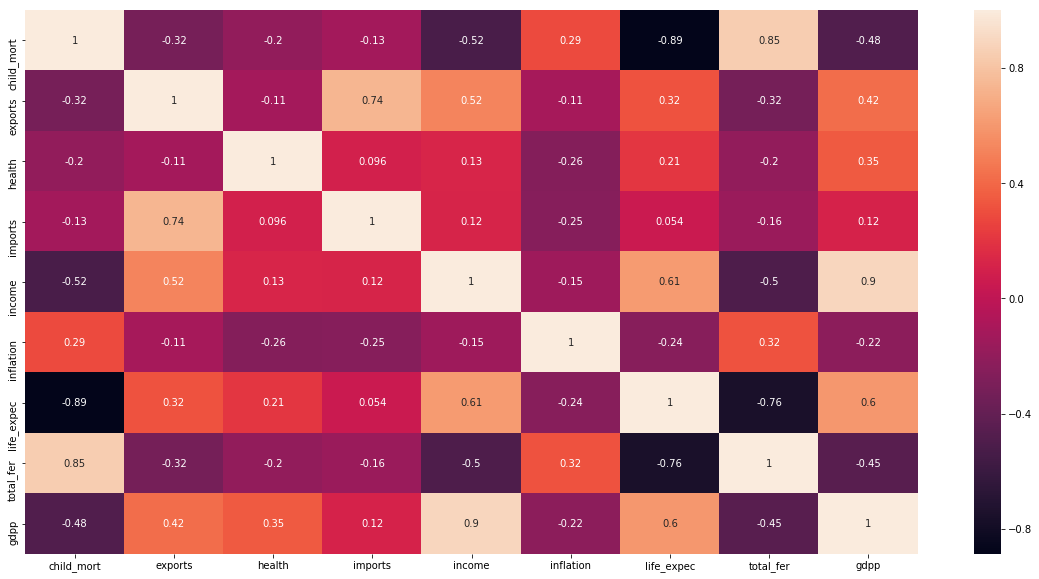

In [407]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country.corr(),annot = True)

### Appliying Principal Component Analysis

In [408]:
X_train.shape

(116, 5)

In [409]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [410]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [411]:
pca.components_

array([[-9.08766288e-04,  2.98938135e-05,  7.18151339e-01,
        -9.09915484e-05,  6.95886355e-01],
       [-8.86268944e-04, -2.18257823e-04,  6.95885748e-01,
         4.19604640e-04, -7.18151806e-01],
       [ 9.94225979e-01, -7.21497234e-03,  1.23684090e-03,
         1.07056598e-01,  3.62660283e-05],
       [-1.07242484e-01, -3.44173623e-02, -3.65828928e-04,
         9.93636868e-01,  3.68887250e-04],
       [ 3.48429836e-03,  9.99381479e-01,  1.26825576e-04,
         3.49925083e-02, -1.64689026e-04]])

In [412]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.000909,-0.000886,child_mort
1,0.000030,-0.000218,health
2,0.718151,0.695886,income
3,-0.000091,0.000420,inflation
4,0.695886,-0.718152,gdpp


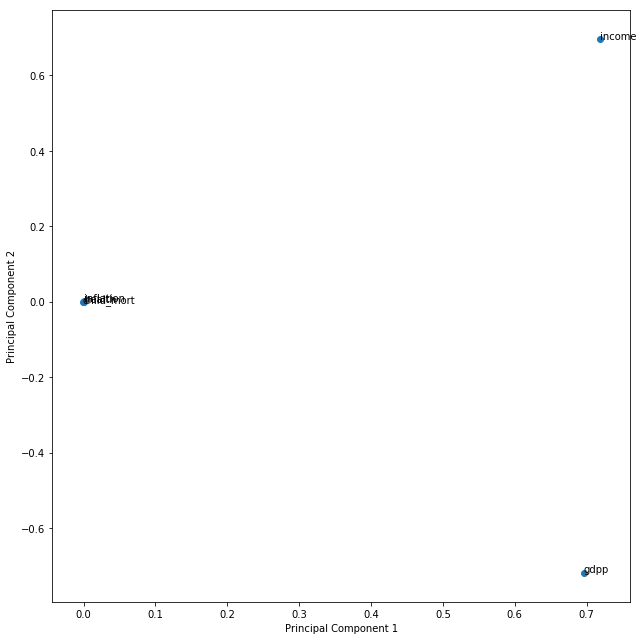

In [413]:
%matplotlib inline
fig = plt.figure(figsize = (9,9))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [414]:
pca.explained_variance_ratio_

array([9.49816692e-01, 5.01809595e-02, 2.11558053e-06, 2.24068313e-07,
       8.41956570e-09])

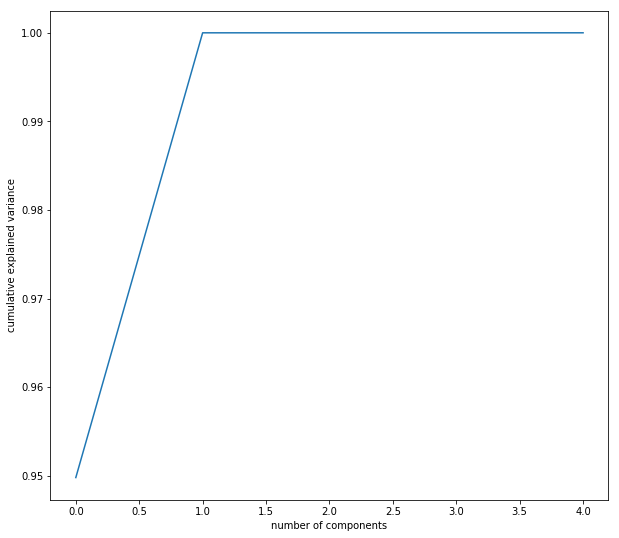

In [415]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 4 components are enough to describe 95% of the variance in the dataset
We'll choose 4 components for our modeling


In [422]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [423]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(116, 4)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [424]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

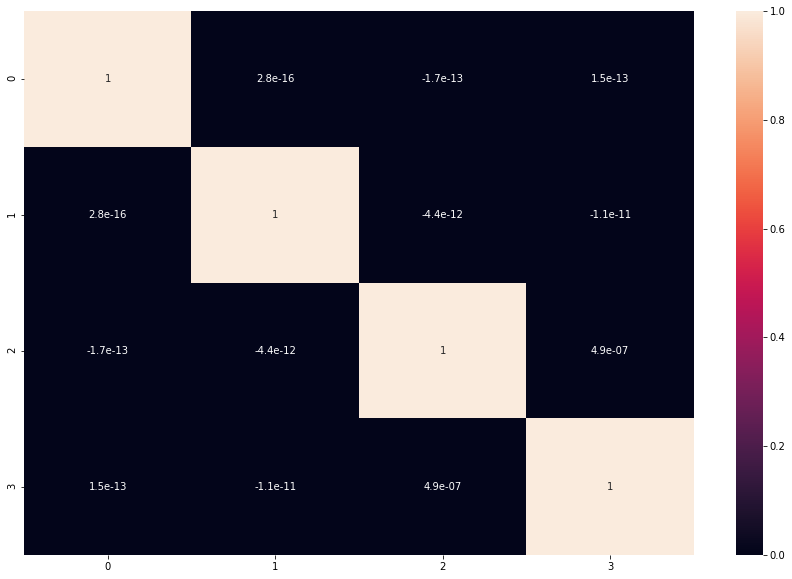

In [425]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

In [426]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 4.926502945809858e-07 , min corr:  -1.0534380076588267e-11


In [427]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(51, 4)

## Applying a K-Means on  Principal Components

In [ ]:
from sklearn import metrics

In [428]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- R (Recency): Number of days since last purchase
- F (Frequency): Number of transactions 
- M (Monetary): Total amount of transactions(revenue contributed)

In [435]:
#  Monetary 
grouped_df=pcs_df.groupby('Feature')['PC1'].sum()
grouped_df =grouped_df.reset_index()
grouped_df.head()

,Feature,PC1
0,child_mort,-0.000909
1,gdpp,0.695886
2,health,0.000030
3,income,0.718151
4,inflation,-0.000091


In [442]:
# Frequency
frequency =pcs_df.groupby('Feature')['PC1'].count()
frequency = frequency.reset_index()
frequency.columns = ['Feature','frequency']
frequency.head()

,Feature,frequency
0,child_mort,1
1,gdpp,1
2,health,1
3,income,1
4,inflation,1


In [440]:
# merge the two data frames

grouped_df = pd.merge(grouped_df, frequency , on='Feature', how='inner')
grouped_df.head()

,Feature,PC1,frequency
0,child_mort,-0.000909,1
1,gdpp,0.695886,1
2,health,0.000030,1
3,income,0.718151,1
4,inflation,-0.000091,1


In [357]:
pcs_df.head()

,PC1,PC2,Feature
0,-0.000909,-0.000886,child_mort
1,0.000030,-0.000218,health
2,0.718151,0.695886,income
3,-0.000091,0.000420,inflation
4,0.695886,-0.718152,gdpp


In [358]:
pcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
PC1        5 non-null float64
PC2        5 non-null float64
Feature    5 non-null object
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [359]:
# recency

last_purchase =pcs_df.groupby('Feature')['PC2'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,Feature,PC2
0,child_mort,-0.000886
1,gdpp,-0.718152
2,health,-0.000218
3,income,0.695886
4,inflation,0.000420


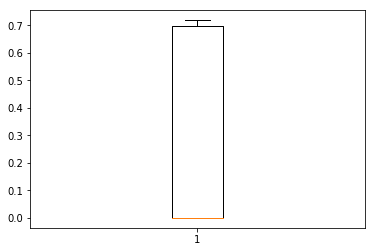

In [362]:
# Outlier treatment

plt.boxplot(grouped_df['PC1'])
plt.show()

#### Removing Outliers

In [365]:
#Q1 = grouped_df.PC2.quantile(0.05)
#Q3 = grouped_df.PC2.quantile(0.95)
#IQR = Q3 - Q1
#grouped_df = grouped_df[(grouped_df.PC1 >= Q1 - 1.5*IQR) & (grouped_df.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.PC1.quantile(0.05)
Q3 = grouped_df.PC1.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.PC1 >= Q1 - 1.5*IQR) & (grouped_df.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for frequency

#Q1 = grouped_df.PC2.quantile(0.05)
#Q3 = grouped_df.PC2.quantile(0.95)
#IQR = Q3 - Q1
#grouped_df = grouped_df[(grouped_df.PC2 >= Q1 - 1.5*IQR) & (grouped_df.PC2 <= Q3 + 1.5*IQR)]


In [367]:
### Rescaling

country_df = grouped_df[['PC1']]
country_df.head()

,PC1
0,-0.000909
1,0.695886
2,0.000030
3,0.718151
4,-0.000091


In [368]:
# Instantiate 

scaler = StandardScaler()

# fit_transform

country_df_scaled = scaler.fit_transform(country_df)
country_df_scaled.shape

(5, 1)

In [369]:
# K-means with some arbitary k

kmeans = KMeans (n_clusters=3, max_iter=50)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [370]:
kmeans.labels_

array([1, 0, 1, 2, 1])

### Finding the optimal Number of Clusters

### SSD (Sum Squared Distance)

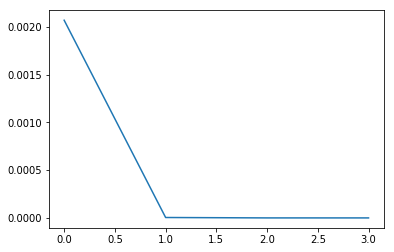

In [375]:
# elbow-curve/SSD (Sum of Squared Distance)
ssd= [ ]
range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd)
plt.show()

### Silhouette Analysis

In [379]:
range_n_clusters = [2,3,4]
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouetter_avg = silhouette_score(country_df_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouetter score is {1}".format(num_clusters,silhouetter_avg))
    

For n_clusters=2, the silhouetter score is 0.9868753714599819
For n_clusters=3, the silhouetter score is 0.5994607923523265
For n_clusters=4, the silhouetter score is 0.3446785309547119


In [380]:
kmeans = KMeans (n_clusters=2, max_iter=50)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [381]:
kmeans.labels_

array([1, 0, 1, 0, 1])

In [382]:
# assign the label

grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,Feature,PC1,frequency,cluster_id
0,child_mort,-0.000909,1,1
1,gdpp,0.695886,1,0
2,health,0.000030,1,1
3,income,0.718151,1,0
4,inflation,-0.000091,1,1


C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


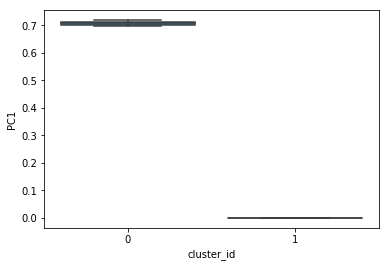

In [383]:
# plot
sns.boxplot(x='cluster_id', y='PC1',data=grouped_df)
plt.show()